<a href="https://colab.research.google.com/github/last-war/HW_DataScience/blob/Homework-06/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.


Навчальний приклад

In [4]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

підготовка датасету

In [5]:
import pandas as pd


df_2d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hw6/data_2d.csv')
df_2d.head

<bound method NDFrame.head of      ind         x         y
0    0.0 -0.768716  0.460860
1    0.0  2.687848  2.366961
2    0.0 -0.201379  0.470430
3    0.0  0.608496  1.225400
4    0.0 -0.082282  1.137218
..   ...       ...       ...
195  1.0  0.629144  4.378584
196  1.0 -0.723824  5.361801
197  1.0  1.346107  2.333476
198  1.0  3.608219  3.411546
199  1.0  3.764228  4.372587

[200 rows x 3 columns]>

Візуалізація початкового датасету

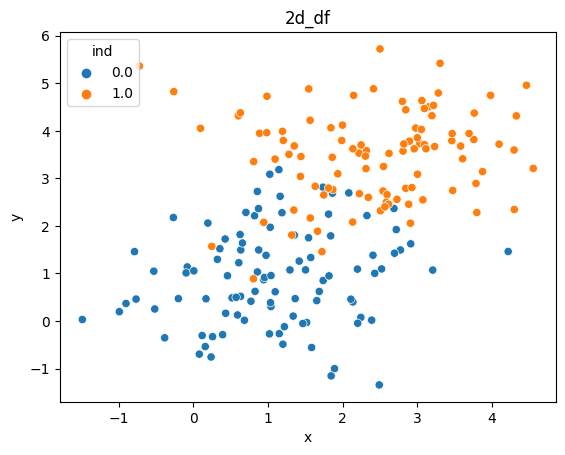

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
df_2d,

sns.scatterplot(x=df_2d['x'], y=df_2d['y'], hue=df_2d['ind']).set(title=f"2d_df")
plt.show()

пошук оптимальної кількості кластерів

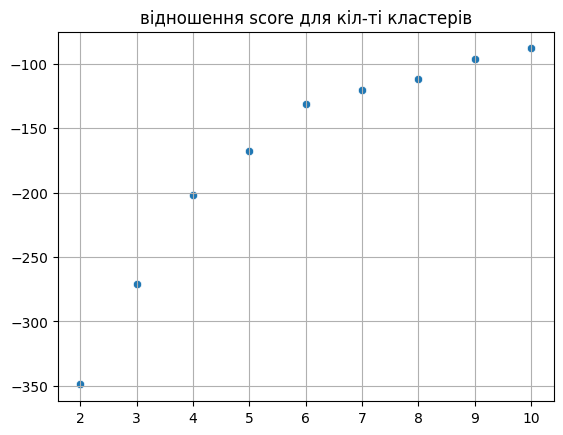

In [9]:

clusters = [2,3,4,5,6,7,8,9,10]
rez = []
for cur_clust in clusters:
    kmean = KMeans(n_clusters=cur_clust, random_state=0, n_init="auto").fit(df_2d.iloc[0:, 1:3])
    rez.append(kmean.score(df_2d.iloc[0:, 1:3]))

sns.scatterplot(x=clusters, y=rez).set(title="відношення score для кіл-ті кластерів")
plt.grid(visible=True)
plt.show()



запуск навчання

[[3.25359974 4.09774241]
 [0.00496133 0.30337369]
 [0.98209515 1.68802423]
 [1.12440813 3.92863952]
 [2.61139377 2.47607712]
 [1.71799514 0.13111204]]


<ipython-input-10-fcedafdbab77>:7: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(pd.DataFrame(kmeans.cluster_centers_), markers='*')


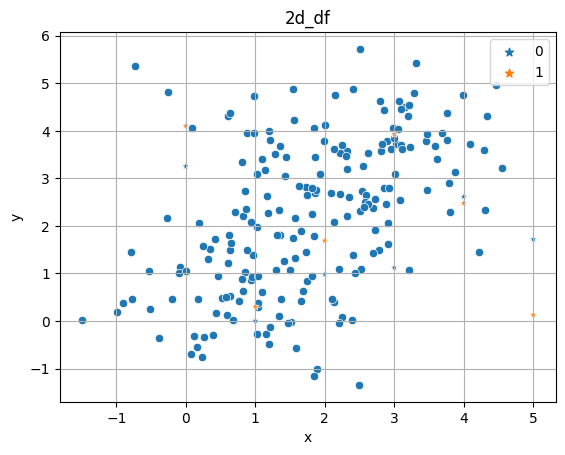

In [10]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(df_2d.iloc[0:, 1:3])

kmeans.labels_

sns.scatterplot(x=df_2d['x'], y=df_2d['y']).set(title=f"2d_df")
print(kmeans.cluster_centers_)
sns.scatterplot(pd.DataFrame(kmeans.cluster_centers_), markers='*')
plt.grid(visible=True)
plt.show()


інша візуалізація

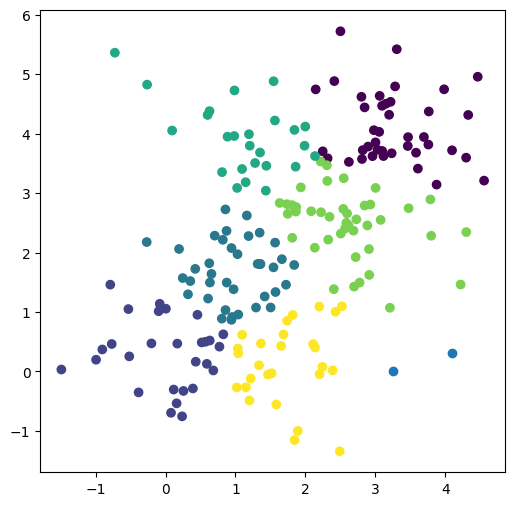

In [11]:
from matplotlib import pyplot as plt
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(df_2d.iloc[0:, 1:3])
plt.figure(figsize=(6, 6))

plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1])
plt.scatter(df_2d['x'], df_2d['y'], c=kmeans.labels_)


In [12]:
df_Хd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hw6/mnist.csv', header=None)
print(df_Хd.shape)
df_Хd.head()

(500, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


розрахунок коррелеції

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [42]:
df_Хd.dropna()
for cur_col in df_Хd.columns:
    if df_Хd[cur_col].sum() == 0:
      df_Хd.drop(cur_col, axis=1, inplace=True)

df_Хd
X_norm = StandardScaler().fit_transform(df_Хd)

<Axes: >

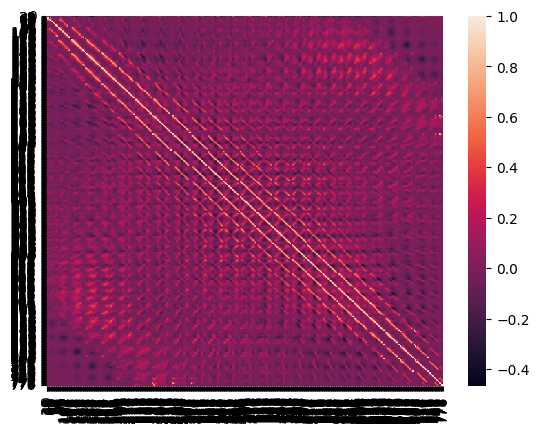

In [44]:
corr = df_Хd.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

виконання РСА для нормалізованих даних

In [45]:
X_pca = PCA(n_components=2).fit_transform(X_norm)

візуалізація

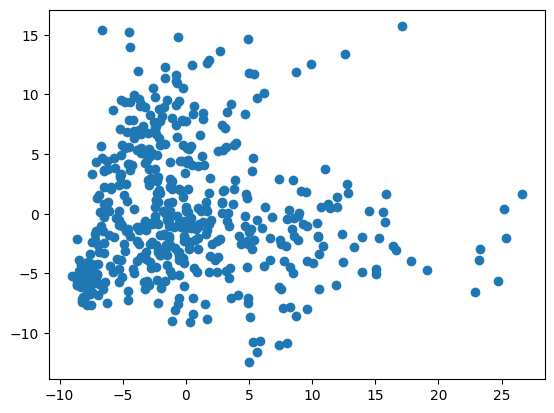

In [46]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

пошук ліктя

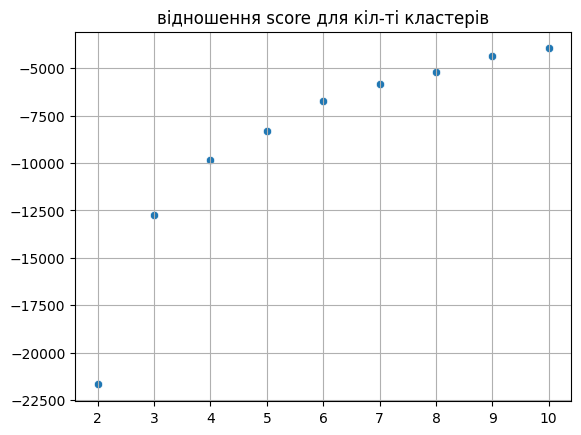

In [48]:
clusters = [2,3,4,5,6,7,8,9,10]
rez = []
for cur_clust in clusters:
    kmean = KMeans(n_clusters=cur_clust, random_state=0, n_init="auto").fit(X_pca)
    rez.append(kmean.score(X_pca))

sns.scatterplot(x=clusters, y=rez).set(title="відношення score для кіл-ті кластерів")
plt.grid(visible=True)
plt.show()


кількість 4
візуалізація

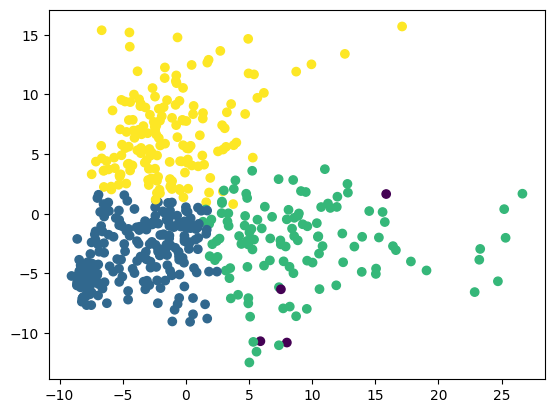

In [50]:
from matplotlib import pyplot as plt



kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X_norm)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.show()
